# Assignment (Text Mining, Forecasting & Tableau)

# Question no - 1

 Explain the steps involved in Bag of Words Model? 

Answer.) Bag-of-words : A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

After collecting the data or sentences in BOW two steps are involved:

- Tokenisation : It make the list of all unique words, whichever words are available in given data or sentances.

- Vectorisation : Process of converting NLP Text into numbering.

Example:

Step 1: Collecting the Data

a) It was the best of times,

b) it was the worst of times,

c) it was the age of wisdom,

d) it was the age of foolishness,

Step 2: Tokenisation -> List of unique word in given sentences:

Token = [“it”, “was”, “the”, “best”, “of”, “times”, “worst”, “age”, “wisdom”, “foolishness”]

here in token have 10 unique words and those word will be as the dictionary or vocabulary for NLP processing of Given data

Step 3: Vectorisation -> To vectorize our documents or given sentences, we've to count each word how many times appear in our sentences.

- "it was the best of times" = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

- "it was the worst of times" = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]

- "it was the age of wisdom" = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

- "it was the age of foolishness " =[1, 1, 1, 0, 1, 0, 0, 1, 0, 1]

now we have vectorize the all sentences.

BOW : A more sophisticated approach is to create a vocabulary of grouped words. This both changes the scope of the vocabulary and allows the bag-of-words to capture a little bit more meaning from the document.

# Question no - 2

Explain about Count vectorizer and TDF-IDF vectorizer with example? 

**TfidfVectorizer** and **CountVectorizer** both are methods for converting text data into vectors as model can process only numerical data.

**CountVectorizer** we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.




# Question no - 3

What is semantic analysis. Explain the techniques to achieve semantic 
analysis 1) Name Entity Recognition 2) Co Reference Resolution? 


Semantic Analysis : Semantic analysis is the process of finding the meaning from text. This analysis gives the power to computers to understand and interpret sentences, paragraphs, or whole documents, by analyzing their grammatical structure, and identifying the relationships between individual words of the sentence in a particular context.

Therefore, the goal of semantic analysis is to draw exact meaning or dictionary meaning from the text. The work of a semantic analyzer is to check the text for meaningfulness.

There are Two Techniques involve in semantic analysis:

- Name Entity Recognition

- Co Reference Resolution

Name Entity Recognition : This focuses on identification of named entities such as persons, locations, organizations which are denoted by proper nouns.

See the below example.

"Michael Jordan is a professor at Berkeley."

- There we can identify two named entities as "Michael Jordan", a person and "Berkeley", a location.

- Named entity recognition can be used in text classification, topic modelling, content recommendations, trend detection.



Co Reference Resolution : What we do in co-reference resolution is, finding which phrases refer to which entities. Here we need to find all the references to an entity within a text document. The words used for referring need not be pronouns.

# Question no - 4

Write a note on Word Embedding? 


Word embedding : It is an approach for representing words and documents. Word Embedding or Word Vector is a numeric vector input that represents a word in a lower-dimensional space. It allows words with similar meaning to have a similar representation. They can also approximate meaning. A word vector with 50 values can represent 50 unique features.

- Embeddings translate large sparse vectors into a lower-dimensional space that preserves semantic relationships.

- Word embeddings is a technique where individual words of a domain or language are represented as real-valued vectors in a lower dimensional space.

- Sparse Matrix problem with BOW is solved by mapping high-dimensional data into a lower-dimensional space.

Lack of meaningful relationship issue of BOW is solved by placing vectors of semantically similar items close to each other. This way words that have similar meaning have similar distances in the vector space.

# Question no - 5

Using the dataset of twitter ‘disaster-tweets’. Create a classification model 
(Logistics Regression) which predicts the tweets about disaster using Count 
vectorization and TDF-IDF vectorization? Explain the difference in outcome? 


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

## Ignoring Warning during trainings 
import warnings
warnings.filterwarnings('ignore')

In [6]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
ts = pd.read_csv('disaster-tweets.csv')

In [9]:
ts

,choose_one,choose_one:confidence,text
0,Relevant,1.0000,Just happened a terrible car crash
1,Relevant,1.0000,Our Deeds are the Reason of this #earthquake M...
2,Relevant,1.0000,"Heard about #earthquake is different cities, s..."
3,Relevant,0.9603,"there is a forest fire at spot pond, geese are..."
4,Relevant,1.0000,Forest fire near La Ronge Sask. Canada
...,...,...,...
10871,Relevant,0.7629,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
10872,Relevant,0.9203,Police investigating after an e-bike collided ...
10873,Relevant,1.0000,The Latest: More Homes Razed by Northern Calif...
10874,Relevant,0.8419,MEG issues Hazardous Weather Outlook (HWO) htt...


In [10]:
print("Train Dataset missing data:\n",ts.isnull().sum(),"\n")

Train Dataset missing data:
 choose_one               0
choose_one:confidence    0
text                     0
dtype: int64 



In [11]:
ts.choose_one.value_counts()

Not Relevant    6187
Relevant        4673
Can't Decide      16
Name: choose_one, dtype: int64

In [13]:
tweet = ts[(ts['choose_one'] == 'Relevant')|(ts['choose_one'] == 'Not Relevant')]
tweet = tweet.replace(['Relevant', 'Not Relevant'],[1,0])
tweet = tweet.rename(columns= {'choose_one' : 'target'})
tweet.head(2)

,target,choose_one:confidence,text
0,1,1.0,Just happened a terrible car crash
1,1,1.0,Our Deeds are the Reason of this #earthquake M...


,target
0,6187
1,4673


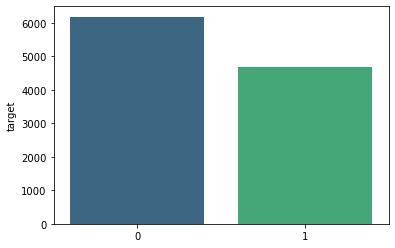

In [14]:
tweet_trend = tweet['target'].value_counts().to_frame()
sns.barplot(data=tweet_trend,x=tweet_trend.index,y="target",palette="viridis")
tweet_trend

In [15]:
texts = tweet['text'].to_list()
labels = tweet['target'].to_list()

In [16]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [17]:
def preprocess(texts):
    x_train = []
    for sent in tqdm(texts):
        sent = re.sub("[^a-zA-Z]", " ", sent)
        sent = sent.lower().split()
        sent = [lemmatizer.lemmatize(word) for word in sent if word not in set(stop_words)]
        sent = ' '.join(sent)
        x_train.append(sent)
    return x_train

In [18]:
tweet_train = preprocess(texts)

100%|██████████████████████████████████████████████████████████████████████████| 10860/10860 [00:03<00:00, 2975.63it/s]


In [19]:
tfidf = TfidfVectorizer(max_features=5000, analyzer='word', ngram_range=(1,2), stop_words='english')
X_train = tfidf.fit_transform(tweet_train).toarray()

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_train, labels, test_size=0.2, random_state=0)

In [21]:
clf = LogisticRegression(max_iter=500, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Classifier: {} \tAccuracy score: {}%'.format(clf.__class__.__name__, 
                                                        accuracy_score(y_pred, y_test)))
print('Classification report: ')
print(classification_report(y_test, y_pred))    

Classifier: LogisticRegression 	Accuracy score: 0.8158379373848987%
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1251
           1       0.83      0.72      0.77       921

    accuracy                           0.82      2172
   macro avg       0.82      0.80      0.81      2172
weighted avg       0.82      0.82      0.81      2172



# Question no - 6

What are the four components of time Series. Give 5 example of time series data?

Ans.) Uses of Time Series

- The most important use of studying time series is that it helps us to predict the future behaviour of the variable based on past experience

- It is helpful for business planning as it helps in comparing the actual current performance with the expected one

- From time series, we get to study the past behaviour of the phenomenon or the variable under consideration

- We can compare the changes in the values of different variables at different times or places, etc.

Components for Time Series Analysis : The various reasons or the forces which affect the values of an observation in a time series are the components of a time series. The four categories of the components of time series are

- Trend

- Seasonal Variations

- Cyclic Variations

- Random or Irregular movements

- Trend : The trend shows the general tendency of the data to increase or decrease during a long period of time. A trend is a smooth, general, long-term, average tendency. It is not always necessary that the increase or decrease is in the same direction throughout the given period of time.

- Seasonal Variations : These are the rhythmic forces which operate in a regular and periodic manner over a span of less than a year. They have the same or almost the same pattern during a period of 12 months. This variation will be present in a time series if the data are recorded hourly, daily, weekly, quarterly, or monthly.

- Cyclic Variations : The variations in a time series which operate themselves over a span of more than one year are the cyclic variations. This oscillatory movement has a period of oscillation of more than a year. One complete period is a cycle. This cyclic movement is sometimes called the ‘Business Cycle’.

- Random or Irregular Movements : There is another factor which causes the variation in the variable under study. They are not regular variations and are purely random or irregular. These fluctuations are unforeseen, uncontrollable, unpredictable, and are erratic. These forces are earthquakes, wars, flood, famines, and any other disasters.

Example of time series:

- Tracking daily, hourly, or weekly weather data

- Forcasting of the salesnamaste for a store

- prediction of the GDP based on growth of the country

- prediction of the growth in business

- forcasting the share price of a stocks

# Question no - 7

Explain the Exponential Smoothing Models in Time Series? 


Answer .) Exponential smoothing models : Exponential smoothing is a time series forecasting method for univariate data.

Time series methods like the Box-Jenkins ARIMA family of methods develop a model where the prediction is a weighted linear sum of recent past observations or lags.

Exponential smoothing forecasting methods are similar in that a prediction is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations.

Types of Exponential Models :

- Single Exponential Smoothing Model

- double exponential Smoothing Model

- tripple exponential Smoothing model

Single Exponential Smoothing Model : Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

Double Exponential Smoothing Model : Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.

In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (b).

The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as Holt’s linear trend model, named for the developer of the method Charles Holt.

- Additive Trend: Double Exponential Smoothing with a linear trend.

- Multiplicative Trend: Double Exponential Smoothing with an exponential trend.

For longer range (multi-step) forecasts, the trend may continue on unrealistically. As such, it can be useful to dampen the trend over time.

Dampening means reducing the size of the trend over future time steps down to a straight line (no trend).

Triple Exponential Smoothing model : Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters.

In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

As with the trend, the seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

- Additive Seasonality: Triple Exponential Smoothing with a linear seasonality.

- Multiplicative Seasonality: Triple Exponential Smoothing with an exponential seasonality.

Triple exponential smoothing is the most advanced variation of exponential smoothing and through configuration, it can also develop double and single exponential smoothing models.

# Question - 8

 Explain the ARIMA models in Time Series? 

ARIMA : ARIMA is a method for forecasting or predicting future outcomes based on a historical time series. It is based on the statistical concept of serial correlation, where past data points influence future data points.

ARIMA forecasting is achieved by plugging in time series data for the variable of interest. Statistical software will identify the appropriate number of lags or amount of differencing to be applied to the data and check for stationarity. It will then output the results, which are often interpreted similarly to that of a multiple linear regression model.

Autoregressive Integrated Moving Average Model : An ARIMA model is a class of statistical models for analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA acronym for Auto Regressive Intigrated Moving Average

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- AR (Autoregression) : A model that uses the dependent relationship between an observation and some number of lagged observations.

- I (Integrated) : The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

- MA (Moving Average) : A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

- p: The number of lag observations included in the model, also called the lag order.

- d: The number of times that the raw observations are differenced, also called the degree of differencing.

- q: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.

# Question - 9

 Using the attached ‘Tractor-Sales.csv’ dataset, Plot the line chart for time 
series. 


In [25]:
tractor = pd.read_csv('Tractor_Sales.csv')
tractor.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


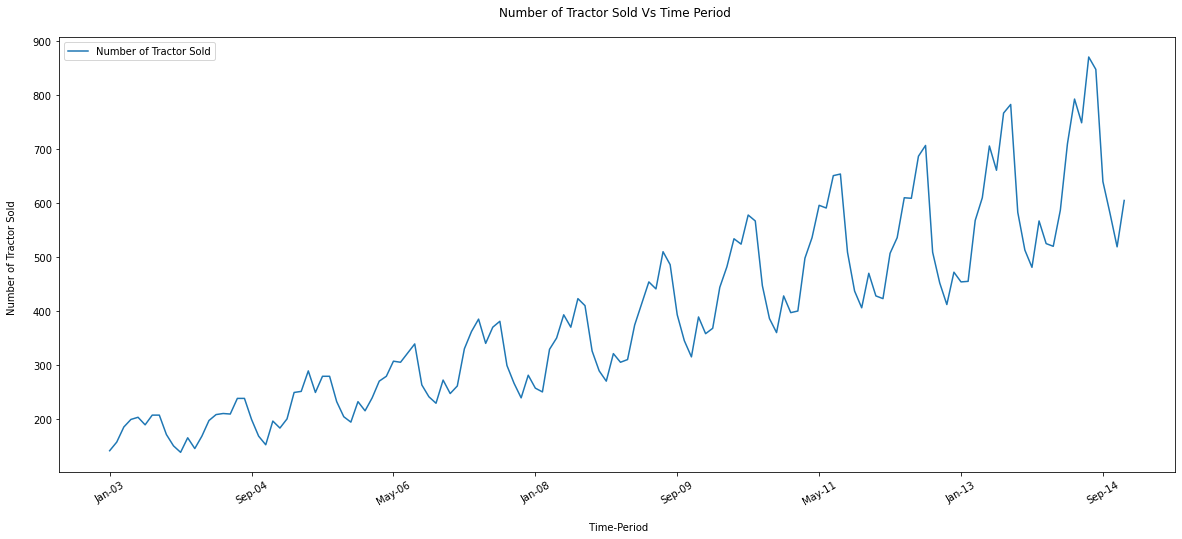

In [26]:
tractor.plot('Month-Year','Number of Tractor Sold',figsize = (20,8))
plt.title('Number of Tractor Sold Vs Time Period \n')
plt.ylabel('Number of Tractor Sold \n')
plt.xlabel('\n Time-Period')
plt.xticks(rotation = 30)
plt.show()

# Submitted by - 

# Hemant Singh Dangi